## Problem Statement

You work for a fitness company and have gathered data on the fitness activities of 50 individuals using fitness trackers. The dataset is stored in an Excel file named "fitness_data.xlsx" and includes the following columns:

- **name:** Name of the person.
- **steps_taken:** The number of steps taken by individuals.
- **calories_burned:** The estimated calories burned by individuals.
- **sleep_duration(hours):** The number of hours of sleep individuals got on that day.
- **water_intake(ounces):** The amount of water individuals consumed.


## Task1

1. Import the data from the "fitness_data.xlsx" Excel file.
2. Display the first few rows of the dataset to get an overview.
3. Calculate and display basic statistics (mean, median, min, max) for each column.


In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_excel("fitness_data.xlsx")

In [16]:
df.head(3)

,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
0,Akshay,10500,4500,7.5,80
1,Priya,9800,4200,7.2,75
2,Raj,11500,4800,7.0,90


In [7]:
df.describe()

,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
count,50.000000,50.000000,50.000000,50.000000
mean,10316.000000,4418.000000,7.396000,79.600000
std,1177.052701,370.708092,1.660951,14.457538
min,8000.000000,3700.000000,4.000000,30.000000
25%,9625.000000,4200.000000,7.000000,70.000000
50%,10250.000000,4400.000000,7.200000,80.000000
75%,11000.000000,4700.000000,7.500000,90.000000
max,15000.000000,5500.000000,18.000000,100.000000


## Task2:  Range and IQR

1. Calculate the range of "steps_taken".
2. Calculate the range of "calories_burned".
3. Calculate the Interquartile Range (IQR) for "sleep_duration(hours)".
4. Calculate the IQR for "water_intake(ounces)".

In [19]:
steps_range = df['steps_taken'].max() - df['steps_taken'].min()
calories_range = df['calories_burned'].max() - df['calories_burned'].min()
sleep_iqr = df['sleep_duration(hours)'].quantile(0.75) - df['sleep_duration(hours)'].quantile(0.25)
water_iqr = df['water_intake(ounces)'].quantile(0.75) - df['water_intake(ounces)'].quantile(0.25)
print("Range of Steps Taken:", steps_range)
print("Range of Calories Burned:", calories_range)
print("IQR of Sleep Duration:", sleep_iqr)
print("IQR of Water Intake:", water_iqr)

Range of Steps Taken: 7000
Range of Calories Burned: 1800
IQR of Sleep Duration: 0.5
IQR of Water Intake: 20.0


## Task3: Box Plot for Steps Taken

- Create a box plot for the "steps_taken" column to visualize the distribution of daily steps taken by individuals. Interpret the box plot and identify any outliers.

In [21]:
import matplotlib.pyplot as plt

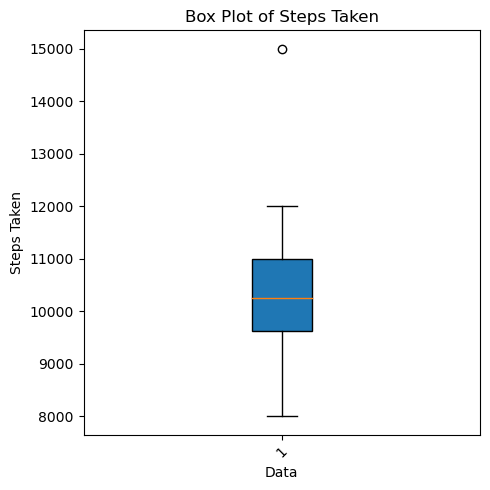

In [29]:
plt.figure(figsize=(5,5))
plt.boxplot(df.steps_taken, vert=True,patch_artist=True)
plt.title('Box Plot of Steps Taken')
plt.xlabel('Data')
plt.ylabel('Steps Taken')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Ensure proper layout and display the plot
plt.tight_layout()
plt.show()


## Task4: 

- Use the IQR method to identify and label outliers in the "sleep_duration(hours)" column.

In [51]:
def get_values(data):
    q1,q3=data['sleep_duration(hours)'].quantile([0.25,0.75])
    IQR = q3-q1
    upper = q1 - IQR*1.5
    lower = q3 + IQR*1.5
    return upper,lower

In [52]:
lower,upper=get_values(df)
print(lower,upper)


6.25 8.25


In [55]:
outliers= df[(df['sleep_duration(hours)']<lower) | (df['sleep_duration(hours)']> upper) ] 
outliers

,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
21,Elena,11700,4900,18.0,100
30,Siddharth,11300,4700,4.0,75
